In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

Los datos tienen una frecuencia teorica de 512Hz. Datos sin procesar. Son datos raw del dispositivo. The signals are passed through analog and digital low and high pass filters to retain signals generally in the 1-50Hz range. After correcting for possible aliasing, these signals are ultimately sampled at 128Hz or 512Hz.

In [2]:
df = pd.read_csv(r"C:/Users/Jorge/Desktop/Proyecto CDIA/Data/train.csv")
df.head()

,label,FP1-0,FP1-1,FP1-2,FP1-3,FP1-4,FP1-5,FP1-6,FP1-7,FP1-8,...,FP1-1014,FP1-1015,FP1-1016,FP1-1017,FP1-1018,FP1-1019,FP1-1020,FP1-1021,FP1-1022,FP1-1023
0,0,36,37,48,62,69,82,98,99,85,...,87,82,94,101,92,78,72,70,63,55
1,2,18,6,5,9,11,9,9,15,23,...,60,65,61,53,39,24,21,29,42,49
2,1,45,55,62,60,55,54,56,57,46,...,19,18,16,8,3,15,43,76,100,104
3,6,23,26,23,16,12,17,29,43,49,...,96,118,117,89,58,45,63,88,95,85
4,5,27,32,37,44,44,41,40,42,39,...,46,33,23,24,35,41,33,26,28,36


In [3]:
df = df.iloc[:, 1:]

In [59]:
eeg_data = list(df.iloc[2, 1:].values)

In [60]:
# Crear una estructura de datos tipo "info" que describe tus datos
info = mne.create_info(ch_names=['FP1'], sfreq=512, ch_types='eeg')
# Crear un objeto RawArray a partir de tus datos
raw = mne.io.RawArray([eeg_data], info)


Creating RawArray with float64 data, n_channels=1, n_times=1023
    Range : 0 ... 1022 =      0.000 ...     1.996 secs
Ready.


In [61]:
raw

<RawArray | 1 x 1023 (2.0 s), ~14 kB, data loaded>

### Filtrado

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\Jorge\AppData\Local\Temp\ipykernel_18756\3757553251.py:15: RuntimeWarning: filter_length (3381) is longer than the signal (1023), distortion is likely. Reduce filter length or filter a longer signal.
  raw_filtered = raw.copy().filter(l_freq=l_freq, h_freq=h_freq)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


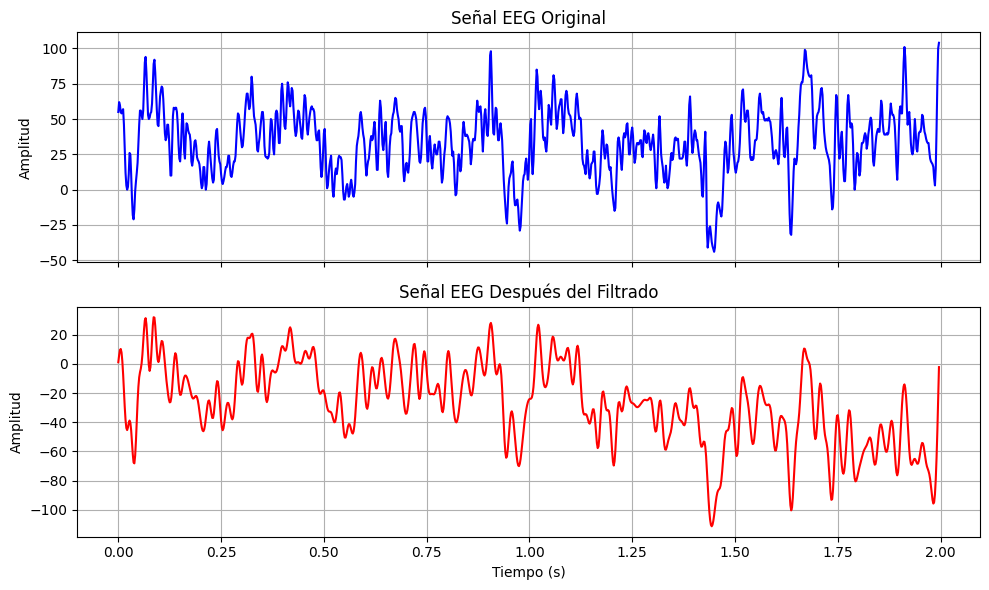

In [100]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes un objeto 'raw' con tus datos EEG cargados

# Selecciona un canal de EEG para visualizar (reemplaza 'EEG 1' con el nombre de tu canal)
channel_name = 'FP1'

# Define los parámetros de filtrado
l_freq = 0.5  # Frecuencia de corte baja
h_freq = 50.0  # Frecuencia de corte alta

# Aplica el filtrado a la señal
raw_filtered = raw.copy().filter(l_freq=l_freq, h_freq=h_freq)

# Extrae la señal original sin filtrar del canal seleccionado
data_original = raw.copy().pick_channels([channel_name]).get_data()[0]

# Extrae la señal filtrada del canal seleccionado
data_filtered = raw_filtered.copy().pick_channels([channel_name]).get_data()[0]

# Configura la figura y el eje para la visualización
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plotea la señal original sin filtrar
ax1.plot(raw.times, data_original, color='b')
ax1.set_title('Señal EEG Original')
ax1.set_ylabel('Amplitud')
ax1.grid()

# Plotea la señal después del filtrado
ax2.plot(raw_filtered.times, data_filtered, color='r')
ax2.set_title('Señal EEG Después del Filtrado')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud')
ax2.grid()

# Ajusta el diseño de la figura y muestra la visualización
plt.tight_layout()
plt.show()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\Jorge\AppData\Local\Temp\ipykernel_18756\2290894601.py:15: RuntimeWarning: filter_length (3381) is longer than the signal (1023), distortion is likely. Reduce filter length or filter a longer signal.
  raw_filtered = raw.copy().filter(l_freq=l_freq, h_freq=h_freq)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


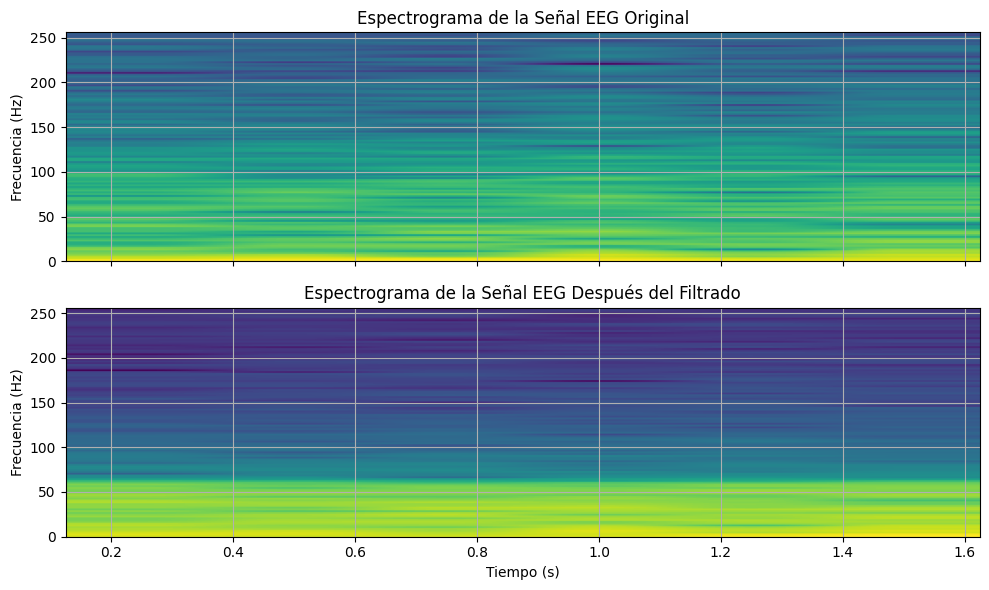

In [101]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes un objeto 'raw' con tus datos EEG cargados

# Selecciona un canal de EEG para visualizar (reemplaza 'EEG 1' con el nombre de tu canal)
channel_name = 'FP1'

# Define los parámetros de filtrado
l_freq = 0.5  # Frecuencia de corte baja
h_freq = 50.0  # Frecuencia de corte alta

# Aplica el filtrado a la señal
raw_filtered = raw.copy().filter(l_freq=l_freq, h_freq=h_freq)

# Extrae la señal original sin filtrar del canal seleccionado
data_original = raw.copy().pick_channels([channel_name]).get_data()[0]

# Extrae la señal filtrada del canal seleccionado
data_filtered = raw_filtered.copy().pick_channels([channel_name]).get_data()[0]

# Configura la figura y el eje para la visualización del espectrograma
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plotea el espectrograma de la señal original sin filtrar
ax1.specgram(data_original, Fs=raw.info['sfreq'], cmap='viridis')
ax1.set_title('Espectrograma de la Señal EEG Original')
ax1.set_ylabel('Frecuencia (Hz)')
ax1.grid()

# Plotea el espectrograma de la señal después del filtrado
ax2.specgram(data_filtered, Fs=raw_filtered.info['sfreq'], cmap='viridis')
ax2.set_title('Espectrograma de la Señal EEG Después del Filtrado')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Frecuencia (Hz)')
ax2.grid()

# Ajusta el diseño de la figura y muestra la visualización
plt.tight_layout()
plt.show()


In [107]:
help(raw.filter)

Help on method filter in module mne.io.base:

filter(l_freq, h_freq, picks=None, filter_length='auto', l_trans_bandwidth='auto', h_trans_bandwidth='auto', n_jobs=None, method='fir', iir_params=None, phase='zero', fir_window='hamming', fir_design='firwin', skip_by_annotation=('edge', 'bad_acq_skip'), pad='reflect_limited', verbose=None) method of mne.io.array.array.RawArray instance
    Filter a subset of channels.
    
    Parameters
    ----------
    
    l_freq : float | None
        For FIR filters, the lower pass-band edge; for IIR filters, the lower
        cutoff frequency. If None the data are only low-passed.
    
    h_freq : float | None
        For FIR filters, the upper pass-band edge; for IIR filters, the upper
        cutoff frequency. If None the data are only high-passed.
    picks : str | array-like | slice | None
        Channels to include. Slices and lists of integers will be interpreted as 
        channel indices. In lists, channel *type* strings (e.g., ``['meg',

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\Jorge\AppData\Local\Temp\ipykernel_18756\2498728900.py:15: RuntimeWarning: filter_length (3381) is longer than the signal (1023), distortion is likely. Reduce filter length or filter a longer signal.
  raw_filtered = raw.copy().filter(l_freq=l_freq, h_freq=h_freq)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


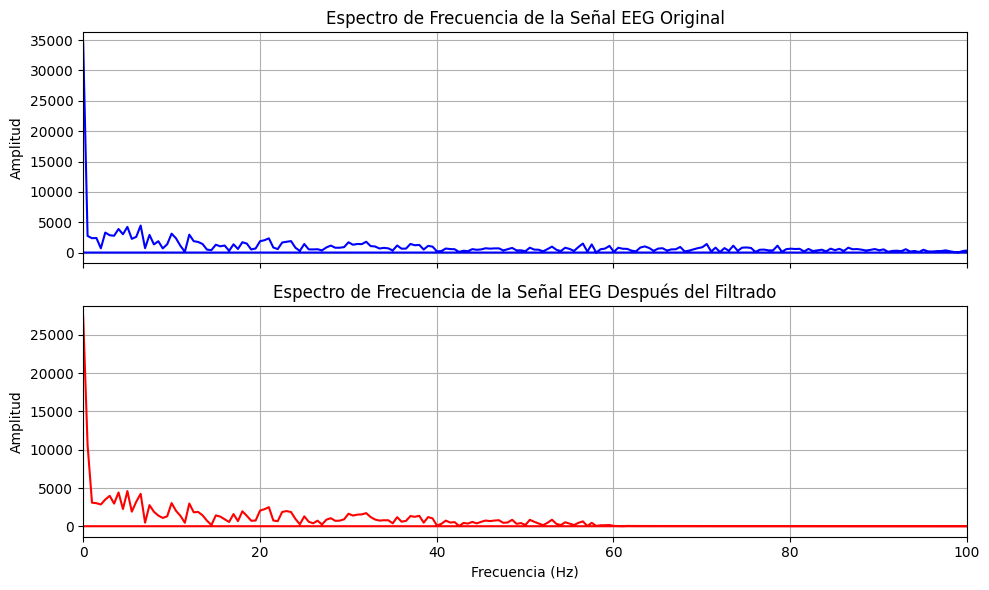

In [105]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes un objeto 'raw' con tus datos EEG cargados

# Selecciona un canal de EEG para visualizar (reemplaza 'EEG 1' con el nombre de tu canal)
channel_name = 'FP1'

# Define los parámetros de filtrado
l_freq = 0.5  # Frecuencia de corte baja
h_freq = 50.0  # Frecuencia de corte alta

# Aplica el filtrado a la señal
raw_filtered = raw.copy().filter(l_freq=l_freq, h_freq=h_freq)

# Extrae la señal original sin filtrar del canal seleccionado
data_original = raw.copy().pick_channels([channel_name]).get_data()[0]

# Extrae la señal filtrada del canal seleccionado
data_filtered = raw_filtered.copy().pick_channels([channel_name]).get_data()[0]

# Calcula la transformada de Fourier para la señal original
fft_original = np.fft.fft(data_original)
freqs_original = np.fft.fftfreq(len(fft_original), 1 / raw.info['sfreq'])

# Calcula la transformada de Fourier para la señal filtrada
fft_filtered = np.fft.fft(data_filtered)
freqs_filtered = np.fft.fftfreq(len(fft_filtered), 1 / raw_filtered.info['sfreq'])

# Configura la figura y el eje para la visualización del espectro de frecuencia
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plotea el espectro de frecuencia de la señal original sin filtrar
ax1.plot(freqs_original, np.abs(fft_original), color='b')
ax1.set_title('Espectro de Frecuencia de la Señal EEG Original')
ax1.set_ylabel('Amplitud')
ax1.set_xlim(0, 100)  # Limita el rango de frecuencias para una mejor visualización
ax1.grid()

# Plotea el espectro de frecuencia de la señal después del filtrado
ax2.plot(freqs_filtered, np.abs(fft_filtered), color='r')
ax2.set_title('Espectro de Frecuencia de la Señal EEG Después del Filtrado')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Amplitud')
ax2.set_xlim(0, 100)  # Limita el rango de frecuencias para una mejor visualización
ax2.grid()

# Ajusta el diseño de la figura y muestra la visualización
plt.tight_layout()
plt.show()


### ICA

In [106]:
# Paso 2: Eliminación de artefactos (ejemplo con ICA)

# UTIL SI TIENES MAS DE UN CANAL

#ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
#ica.fit(raw)
#ica.plot_components()
#ica.exclude = [1, 2]  # Indica los componentes que se deben eliminar
#raw = ica.apply(raw)


Fitting ICA to data using 1 channels (please be patient, this may take a while)


C:\Users\Jorge\AppData\Local\Temp\ipykernel_18756\3011375451.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


ValueError: ica.n_components (20) cannot be greater than len(picks) (1)

In [ ]:

# Paso 3: Referenciación (por ejemplo, promedio)
# Mas de un canal
#raw.set_eeg_reference(ref_channels='average', projection=True)


In [25]:
# EJECUTAR AL FINAL

# Definir las bandas de frecuencia de interés
freq_bands = [(8, 13), (13, 30), (30, 50)]  # Por ejemplo, alfa, beta, gamma

# Calcular la densidad espectral de potencia (PSD)
spectrum = raw.compute_psd(method="welch")
data, freqs = spectrum.get_data(return_freqs=True)

# Calcular la potencia media en cada banda de frecuencia
power_band = []
for fmin, fmax in freq_bands:
    power_band.append(np.mean(data[:, (freqs >= fmin) & (freqs < fmax)], axis=1))

Effective window size : 1.998 (s)
